# Midterm - Question 1
- Perform Analysis on Enron dataset

In [120]:
from email.parser import Parser                     #Import email parser to read the emails
import email                                        
import os                                           #Import OS module to use os.walk functionality
import requests
import json,re,datetime
import shutil                                       #Import shutil to copy data from one directory to other
from datetime import datetime                      #Import datetime 
import matplotlib.pyplot as plt                    #Import matplotlib to plot graphs
import pylab as pl
from nltk.corpus import stopwords

- Creating a new directory in 'month - year' format and storing Enron data in that folder structure.

In [105]:
def create_dir(path_to_folder):  
    if not os.path.exists(path_to_folder): 
        os.makedirs(path_to_folder)

In [109]:
path_to_data=r'C:/Users/Anurag/Desktop/python/midterm/Question1/maildir'      #Define path for enron dataset
path_to_folder=r'C:/Users/Anurag/Desktop/python/midterm/Question1/Enron_mails'    #Define path to create new directory

for root, dirs, files in os.walk(path_to_data):                #Walk directory to get root,directories and files
    for d in dirs:                                             #Iterate through diretories
        path=os.path.join(path_to_data+'/'+d)                  #join directory name to the current path
        for root,dirs,files in os.walk(path):                  #walk through new path to get the new root, directories and files
            for di in dirs:
                if di=='_sent_mail' or di.startswith('sent'):  #Check if the files startswith key word sent or _Sent
                    path=os.path.join(path+'/'+di)             #If yes, Join the name to the current path
                    for root,dirs,files in os.walk(path):      #repeat previous steps to get root, directories and files
                        for file in files:                     #Iterate through all files
                            path1=os.path.join(path+'/'+file+'.')
                            with open(path1,'r',encoding='utf-8',errors='ignore') as root:   #Open file in 'read' mode
                                data=root.read()                                             #read content of the files and store them in variable named 'data'
                            email1=Parser().parsestr(data)                       #Parse the content of 'data' and store the information in 'email1' variable
                            foo = email1['Date'][:31].strip()                    #Change the date format
                            print('')
                            datetime_object = datetime.strptime(foo, "%a, %d %b %Y %H:%M:%S %z")
                            monthYear=(str(datetime_object.month))+"-"+(str(datetime_object.year))
                            path3=os.path.join(path_to_folder+"/"+monthYear)
                            create_dir(path3)
                            shutil.copy(path1,path3)

date Wed, 13 Dec 2000 07:04:00 -0800
date Tue, 5 Dec 2000 07:31:00 -0800
date Wed, 6 Sep 2000 08:54:00 -0700
date Wed, 6 Sep 2000 07:02:00 -0700
date Wed, 6 Sep 2000 07:00:00 -0700
date Wed, 6 Sep 2000 06:04:00 -0700
date Wed, 6 Sep 2000 04:46:00 -0700
date Wed, 6 Sep 2000 03:46:00 -0700
date Tue, 5 Sep 2000 23:22:00 -0700
date Tue, 5 Sep 2000 06:51:00 -0700
date Tue, 5 Sep 2000 06:30:00 -0700
date Fri, 1 Sep 2000 06:08:00 -0700
date Mon, 4 Dec 2000 06:23:00 -0800
date Thu, 31 Aug 2000 07:36:00 -0700
date Thu, 31 Aug 2000 06:54:00 -0700
date Thu, 31 Aug 2000 06:14:00 -0700
date Thu, 31 Aug 2000 05:02:00 -0700
date Thu, 31 Aug 2000 03:17:00 -0700
date Wed, 30 Aug 2000 08:14:00 -0700
date Wed, 30 Aug 2000 06:20:00 -0700
date Tue, 29 Aug 2000 09:20:00 -0700
date Tue, 29 Aug 2000 05:38:00 -0700
date Mon, 28 Aug 2000 09:30:00 -0700
date Wed, 29 Nov 2000 08:22:00 -0800
date Mon, 28 Aug 2000 06:40:00 -0700
date Mon, 28 Aug 2000 06:12:00 -0700
date Mon, 28 Aug 2000 06:07:00 -0700
date Fri, 25 

In [110]:
analysis_path=r'C:\Users\Anurag\Desktop\python\midterm\Question1\Enron_mails'
list_count={}
my_list=['meeting','attach','email','thank','inform','receive','file']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            for file in files:
                path1=os.path.join(path+'/'+file)
                with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                    file_data=root.read()
                list_email=Parser().parsestr(file_data)
                list_read=list_email.get_payload()
                list_lower_words=list_read.lower()                             #Convert the content to lower case
                list_words = list_lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
                for word in list_words:
                    if word in my_list:
                        foo = list_email['Date'][:31].strip()                    #Change the date format
                        datetime_object = datetime.strptime(foo, "%a, %d %b %Y %H:%M:%S %z")
                        monthYear=(str(datetime_object.month))+"-"+(str(datetime_object.year))#Checking if the word is an alphabet
                        if monthYear not in list_count:
                            list_count[monthYear] = 1                         #If words doen't exist assign it a value 1
                        else:
                            list_count[monthYear] += 1 

for dates in list_count.keys():
    sorted_list=sorted(list_count.items(), key=lambda dates: datetime.strptime(str(dates[0]), "%m-%Y"))   #Use of lambda function to sort the words in descending order of their frequency

Month and Year Sorted List:
  [('10-1998', 1), ('11-1998', 14), ('12-1998', 14), ('1-1999', 57), ('2-1999', 26), ('3-1999', 15), ('4-1999', 9), ('5-1999', 44), ('6-1999', 57), ('7-1999', 74), ('8-1999', 89), ('9-1999', 182), ('10-1999', 112), ('11-1999', 76), ('12-1999', 213), ('1-2000', 381), ('2-2000', 443), ('3-2000', 523), ('4-2000', 388), ('5-2000', 501), ('6-2000', 515), ('7-2000', 653), ('8-2000', 748), ('9-2000', 595), ('10-2000', 997), ('11-2000', 784), ('12-2000', 955), ('1-2001', 1272), ('2-2001', 1181), ('3-2001', 1184), ('4-2001', 1284), ('5-2001', 1185), ('6-2001', 627), ('7-2001', 543), ('8-2001', 570), ('9-2001', 344), ('10-2001', 601), ('11-2001', 809), ('12-2001', 335), ('1-2002', 379), ('2-2002', 236), ('3-2002', 234), ('4-2002', 68), ('5-2002', 36), ('6-2002', 60), ('7-2002', 2)]


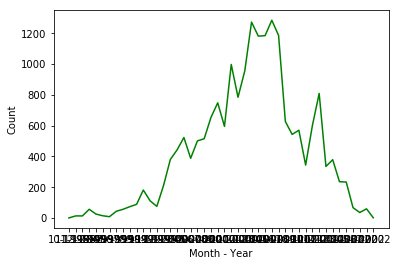

In [111]:
list_monthyear=[]
list_monthyear_count=[]

for words in sorted_list:
    list_monthyear.append(words[0])
        
for values in sorted_list:
    list_monthyear_count.append(values[1])
    

print('Month and Year Sorted List:\n ',sorted_list)
pl.figure(1)   
x= range(46)
pl.xticks(x,list_monthyear)
pl.plot(x,list_monthyear_count,'g')
pl.xlabel('Month - Year')
pl.ylabel('Count')
pl.show()

# Analysis 2
- Finding employees those were involved in dicussion of 'gifts' and 'rewards'

In [112]:
new_path=r'C:\Users\Anurag\Desktop\python\midterm\Question1\Analysis_2'
def new_dir(new_path):  
    if not os.path.exists(new_path): 
        os.makedirs(new_path)

In [113]:
analysis_path=r'C:\Users\Anurag\Desktop\python\midterm\Question1\Enron_mails'
my_list1=['reward','gift']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            for file in files:
                path1=os.path.join(path+'/'+file)
                with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                    data=root.read()
                email=Parser().parsestr(data)
                read_file1=email.get_payload()
                lower_words1=read_file1.lower()                             #Convert the content to lower case
                words1 = lower_words1.split()                               #Split() function separates the words with whitespace and add it to the words list
                for word in words1:
                    if word in my_list1:
                        foo = email['Date'][:31].strip()                    #Change the date format
                        datetime_object = datetime.strptime(foo, "%a, %d %b %Y %H:%M:%S %z")
                        Year=(str(datetime_object.year))
                        new_path1=os.path.join(new_path+'/'+Year)
                        new_dir(new_path1)
                        gift_from=email['From']
                        gift_to=email['To']
                        mail_content=email.get_payload()
                        #print('from',mail_content)                        
                        mail_format=('Lead:',str(gift_from))
                        mail_format1=('Audience:',str(gift_to))
                        mail_format2=('Keyword',word)
                        completename=os.path.join(new_path1,gift_from+".txt")
                        file1 = open(completename, "w",newline='\n')
                        file1.write(str(mail_format)+'\n')
                        file1.write(str(mail_format1)+'\n')
                        file1.write(str(mail_format2))
                        file1.close()



# Analysis 3
- Comparing number of mails containing 'gits' and 'rewards' for year 1999 and 2001

In [129]:
Stopwords=stopwords.words('english')
frequency_1999={}
my_list1=['reward','gift']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            if d.endswith('1999'):
                for file in files:
                    path1=os.path.join(path+'/'+file)
                    with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                        data_1999=root.read()
                    email_1999=Parser().parsestr(data_1999)
                    read_file=email_1999.get_payload()
                    lower_words=read_file.lower()                             #Convert the content to lower case
                    words = lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
                    for word in words:
                        if word in my_list1:
                            if word not in frequency_1999:                       #Checking if the word already exist in the dictionary
                                frequency_1999[word] = 1                         #If words doen't exist assign it a value 1
                            else:
                                frequency_1999[word] += 1 


for words in frequency_1999.keys():
    sorted_list1=sorted(frequency_1999.items(), key=lambda words: (str(words)))
    
print('sorted_list',sorted_list1)

sorted_list [('gift', 32), ('reward', 4)]


In [128]:
frequency_2001={}
my_list=['reward','gift']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            if d.endswith('2001'):
                for file in files:
                    path1=os.path.join(path+'/'+file)
                    with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                        data_1999=root.read()
                    email_1999=Parser().parsestr(data_1999)
                    read_file=email_1999.get_payload()
                    lower_words=read_file.lower()                             #Convert the content to lower case
                    words = lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
                    for word in words:
                        if word in my_list:                                        #Checking if the word is an alphabet
                            if word not in frequency_2001:                       #Checking if the word already exist in the dictionary
                                frequency_2001[word] = 1                         #If words doen't exist assign it a value 1
                            else:
                                frequency_2001[word] += 1 
                                

for words in frequency_2001.keys():
    sorted_list=sorted(frequency_2001.items(), key=lambda words: (str(words)))
    
print('sorted_list',sorted_list)

sorted_list [('gift', 101), ('reward', 18)]


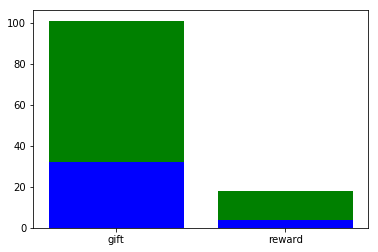

In [137]:
word_1999=[]
frequency_list_1999=[]
for words in sorted_list1:
    if words not in word_1999: 
        word_1999.append(words[0])
        
for values in sorted_list1:
    if values not in frequency_list_1999:
        frequency_list_1999.append(values[1])


word_2001=[]
frequency_list_2001=[]
for words in sorted_list:
    if words not in word_2001: 
        word_2001.append(words[0])
        
for values in sorted_list:
    if values not in frequency_list_2001:
        frequency_list_2001.append(values[1])

        
z1=[1,2]
bar_width=2
plt.bar(z1,frequency_list_2001,color='g')
plt.bar(z1,frequency_list_1999,color='b')
plt.xticks(z1,word_2001)
plt.xticks(z1,word_1999)
plt.show()

# Analysis 3 - Conclusion

- Number of mails containing keywords 'gift' and 'rewards' has been incresed in 2001 as compared to year 199